# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [13]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

<h2>Simon's notes:</h2>

<b>n-hot encoding</b>: for more than 2 categories in column <br>
<b>dummy variables</b>: ideal for 2 categorical columns


Percents of missing data in each column: 
TotalFilters                  0.000000
MaxTypicalFlow               20.253165
AverageFilterArea             5.063291
AverageTypicalRunVolume       2.531646
AverageBackwashVolume        12.658228
PrimaryTrigger                0.000000
AverageTotalFilterDepth      41.772152
OverallFilterGrainSizeMin    43.037975
OverallFilterGrainSizeMax    43.037975
AverageFilterBedVolume       43.037975
FilterExploitation           20.253165
AerationType                  0.000000
OxygenFactor                  0.000000
Stage1HLR                    26.582278
TotalEBCT                    49.367089
Footprint                     5.063291
SumOfld_layer                49.367089
UniformityCoefficient        64.556962
UFRV                          8.860759
BW%                          16.455696
HLR_BW                       34.177215
TankCapacity                  5.063291
TankExploitation             37.974684
GravityPressureMixed          0.000000
Stages                

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,57.886530,Cascade,1.880000,1.388889,143.341204,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,63.521586,Air injection,1.620000,11.204508,16.714412,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,64.908486,Bottom aeration,2.213333,3.935020,44.693822,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,Cascade,2.073333,NaN,194.588021,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,Cascade,1.313333,NaN,412.300024,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,91.698648,Cascade,1.546667,5.242647,24.106636,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,89.405620,Passive plate aerator,2.133333,6.912876,22.050800,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,19.331598,Bottom aeration,1.673333,2.824380,209.076387,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,Cascade,2.200000,NaN,152.513970,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


Columns data types: 
TotalFilters                 int64
MaxTypicalFlow             float64
AverageFilterArea          float64
AverageTypicalRunVolume    float64
AverageBackwashVolume      float64
PrimaryTrigger              object
FilterExploitation         float64
AerationType                object
OxygenFactor               float64
Stage1HLR                  float64
Footprint                  float64
UFRV                       float64
BW%                        float64
HLR_BW                     float64
TankCapacity               float64
TankExploitation           float64
GravityPressureMixed        object
Stages                      object
AbstractedVolume             int64
dtype: object


,PrimaryTrigger,AerationType,GravityPressureMixed,Stages,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,TotalFilters,AbstractedVolume
0,Time,Cascade,Gravity,Single,50.000000,6.000000,5200.000000,10.00,57.886530,1.880000,1.388889,143.341204,866.666667,0.414525,34.031933,27.294778,24.587053,6.0,253543.0
1,Volume,Air injection,Pressure,Double,110.000000,4.908739,300.000000,28.00,63.521586,1.620000,11.204508,16.714412,40.743665,23.000062,30.557749,2.576075,25.701910,4.0,612094.0
2,Volume,Bottom aeration,Gravity,Double,120.000000,15.343900,3800.000000,83.30,64.908486,2.213333,3.935020,44.693822,249.217919,2.192086,32.791831,21.825600,24.912719,4.0,682318.0
3,Volume,Cascade,Gravity,Single,78.313740,16.000000,1200.000000,26.00,47.487692,2.073333,-2.066658,194.588021,75.000000,2.166907,28.309246,12.554300,25.493544,2.0,156998.0
4,Volume,Cascade,Gravity,Single,-279.949734,1.495000,250.000000,4.50,11.558802,1.313333,-12.654651,412.300024,167.224093,1.818182,24.988253,52.220566,25.622719,2.0,6710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Mix,Cascade,Gravity,Double,1426.000000,47.940002,13995.635484,110.00,91.698648,1.546667,5.242647,24.106636,366.492967,0.178441,43.227478,9.176959,39.682540,16.0,11454775.0
75,Volume,Passive plate aerator,Pressure,Single,1407.290000,10.178760,4500.000000,57.00,89.405620,2.133333,6.912876,22.050800,442.097088,1.236822,51.086775,6.040393,25.090237,20.0,11021800.0
76,Time,Bottom aeration,Gravity,Single,250.000000,14.752500,2331.501370,51.57,19.331598,1.673333,2.824380,209.076387,158.041107,4.446077,30.367735,22.367525,45.833333,6.0,423362.0
77,Volume,Cascade,Gravity,Double,452.942951,37.437401,4400.000000,134.00,70.276847,2.200000,-1.488378,152.513970,93.489396,35.386015,32.053507,13.234441,24.863160,12.0,1521895.0


Column PrimaryTrigger has 4 categories
Column AerationType has 8 categories
Column GravityPressureMixed has 3 categories
Column Stages has 4 categories


,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,...,A_Other,A_Passive plate aerator,A_Pure oxygen injection,G_Gravity,G_Mixed,G_Pressure,S_Double,S_Mixed,S_Single,S_Triple
0,50.000000,6.000000,5200.000000,10.00,57.886530,1.880000,1.388889,143.341204,866.666667,0.414525,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,110.000000,4.908739,300.000000,28.00,63.521586,1.620000,11.204508,16.714412,40.743665,23.000062,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,120.000000,15.343900,3800.000000,83.30,64.908486,2.213333,3.935020,44.693822,249.217919,2.192086,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,78.313740,16.000000,1200.000000,26.00,47.487692,2.073333,-2.066658,194.588021,75.000000,2.166907,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-279.949734,1.495000,250.000000,4.50,11.558802,1.313333,-12.654651,412.300024,167.224093,1.818182,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1426.000000,47.940002,13995.635484,110.00,91.698648,1.546667,5.242647,24.106636,366.492967,0.178441,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
75,1407.290000,10.178760,4500.000000,57.00,89.405620,2.133333,6.912876,22.050800,442.097088,1.236822,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
76,250.000000,14.752500,2331.501370,51.57,19.331598,1.673333,2.824380,209.076387,158.041107,4.446077,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
77,452.942951,37.437401,4400.000000,134.00,70.276847,2.200000,-1.488378,152.513970,93.489396,35.386015,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


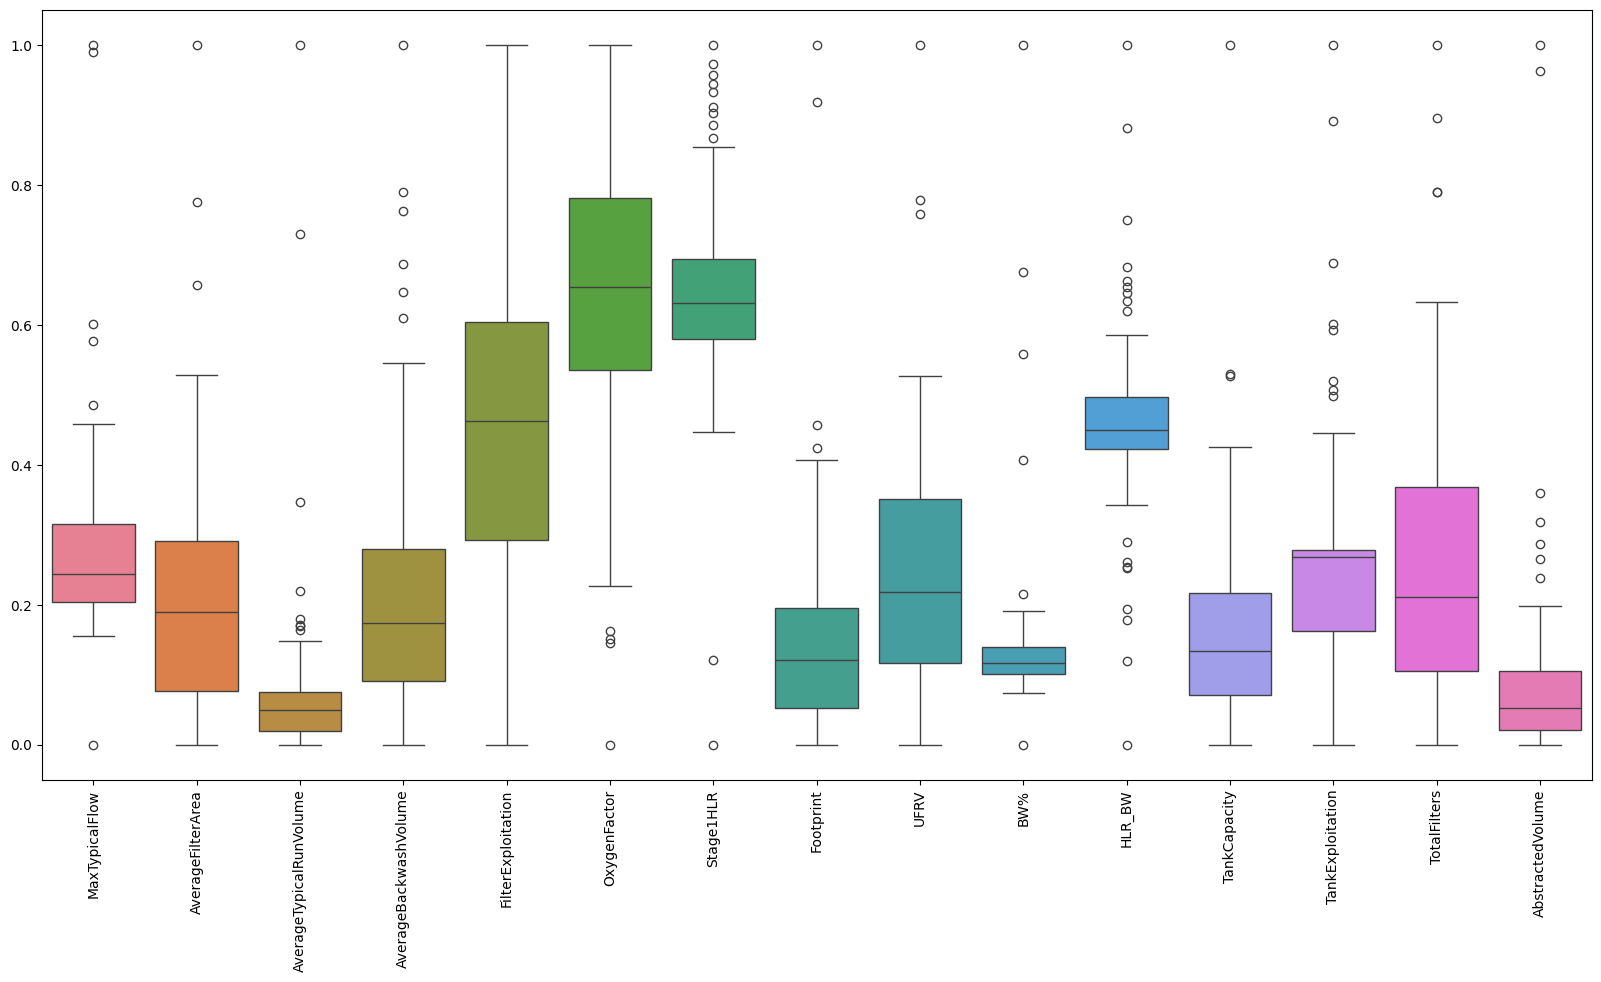

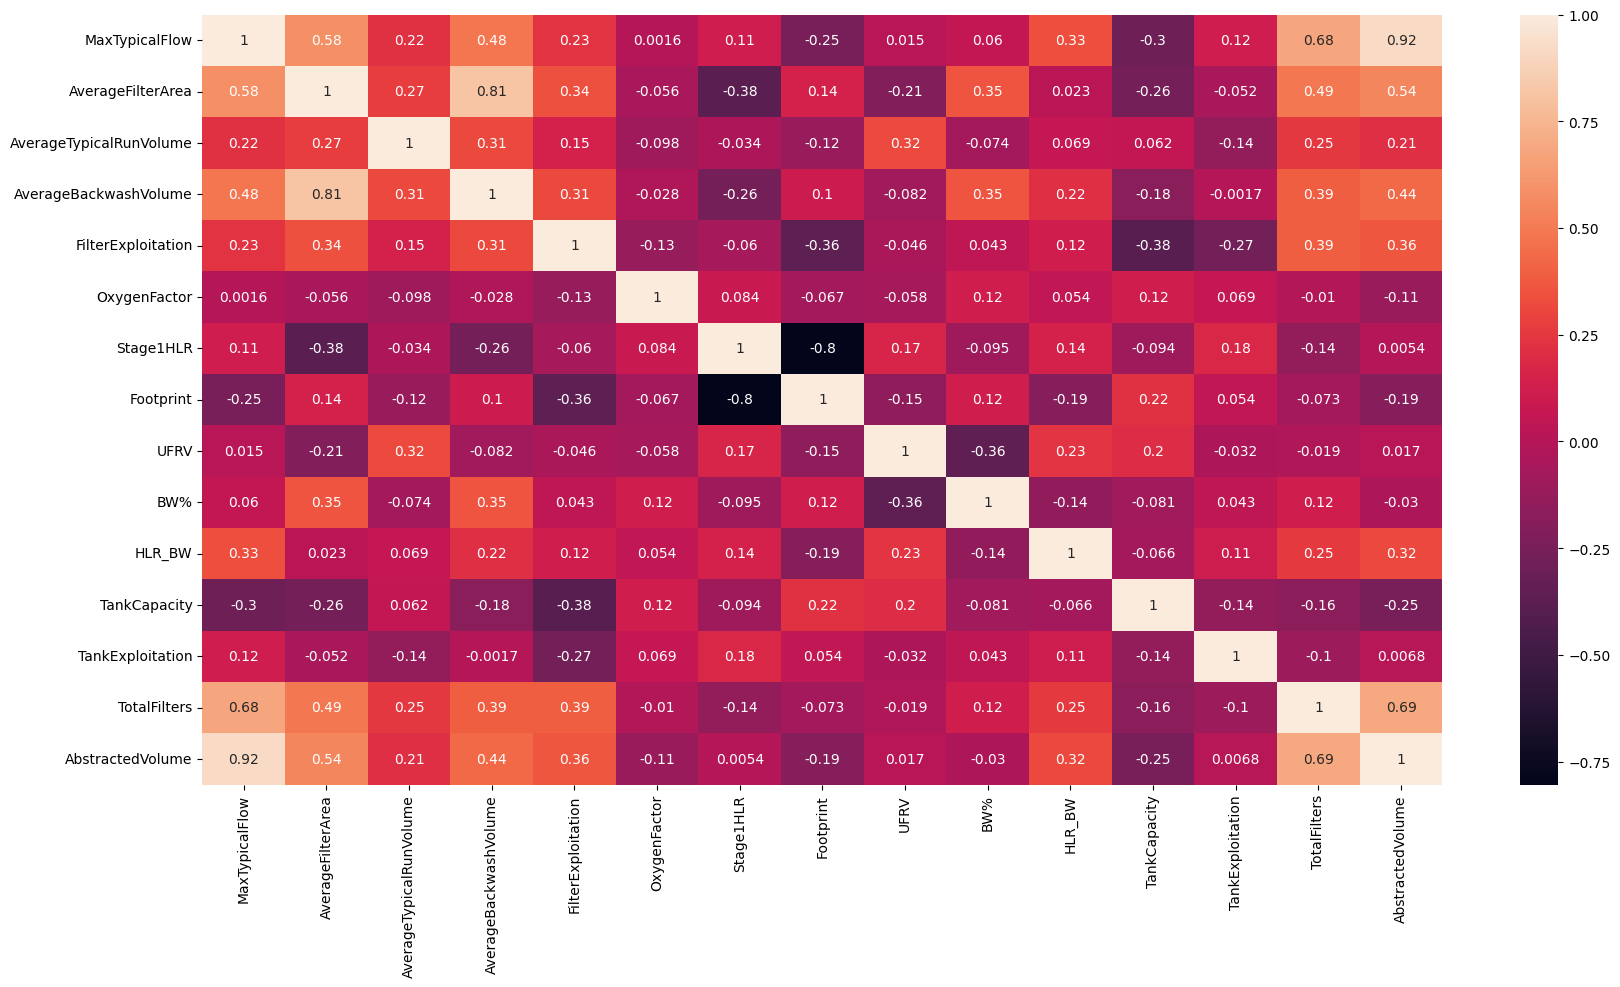

In [37]:
#remove irrelevant columns: WaterworksName
removedNamesDf = df.drop(columns=['WaterworksName'])

#calculate how much procent of data each column is missing
missing_data = removedNamesDf.isnull().sum()
total = removedNamesDf.isnull().count()
percent_missing = (missing_data/total)*100
print(f"Percents of missing data in each column: \n{percent_missing}")

#remove columns with more than 40% missing data
removedColumnsDf = removedNamesDf.dropna(thresh=removedNamesDf.shape[0]*0.6,axis=1)
display(removedColumnsDf)

#print the columns data types
print(f"Columns data types: \n{removedColumnsDf.dtypes}")

#impute missing values of the columns, use fillna method if the data type is ibject, and use IterativeImputer if the data type is float64 or int64
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

#split the dataset into two datasets, one with object data types and one with float64 and int64 data types
objectDf = removedColumnsDf.select_dtypes(include=['object'])
floatDf = removedColumnsDf.select_dtypes(include=['float64'])
intDf = removedColumnsDf.select_dtypes(include=['int64'])

#impute missing values of the object data type columns
imputer = SimpleImputer(strategy='most_frequent')
objectDf = pd.DataFrame(imputer.fit_transform(objectDf), columns=objectDf.columns)

#impute missing values of the float64 and int64 data type columns
imputer = IterativeImputer(max_iter=10, random_state=0)
floatDf = pd.DataFrame(imputer.fit_transform(floatDf), columns=floatDf.columns)
intDf = pd.DataFrame(imputer.fit_transform(intDf), columns=intDf.columns)

#concatenate the datasets
imputedDf = pd.concat([objectDf, floatDf, intDf], axis=1)
display(imputedDf)

#print how many categories there are in columns of data type object
for column in objectDf:
    print(f"Column {column} has {objectDf[column].nunique()} categories")
    #if more than 2 categories, use one hot encoding from pandas, use first letter of the column name as prefix
    if objectDf[column].nunique() > 2:
        imputedDf = pd.get_dummies(imputedDf, columns=[column], prefix=column[0], dtype=float)

display(imputedDf)

#boxplot all columns in one figure
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
imputedDf = pd.DataFrame(scaler.fit_transform(imputedDf), columns=imputedDf.columns)

numericalColumnsDf = imputedDf.drop(columns=imputedDf.filter(regex='^P_|^A_|^G_|^S_'))

plt.figure(figsize=(20,10))
#without columns that begin P_, A_, G_, S_
sns.boxplot(data=numericalColumnsDf)
plt.xticks(rotation=90)
plt.show()

#create a correlation matrix
correlationMatrix = numericalColumnsDf.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlationMatrix, annot=True)
plt.show()

